In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.metrics import *

In [2]:
X,y = make_classification(n_samples=1000,n_features=2, n_informative=1,
                         n_redundant=0,n_classes=2,n_clusters_per_class=1, random_state=41,
                         hypercube=False, class_sep=10)

In [3]:
X

array([[-0.20535429, -2.86386516],
       [-0.31575309, -0.87698029],
       [-0.25640262, -2.47773077],
       ...,
       [-0.42153598,  0.16589003],
       [ 0.37325639,  0.47467773],
       [-0.06012331, -1.30409991]])

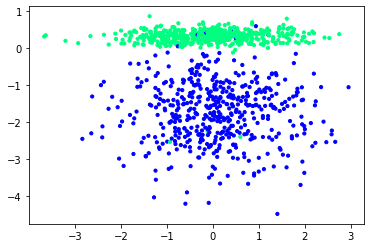

In [4]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=10)
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
params = {'penalty': ['l1', 'l2', 'elasticnet', None], 
         'dual' : [True,False], 
         'tol' : [0.0001],
         'C' : [1.0], 
         'fit_intercept' : [True], 
         'intercept_scaling' : [1], 
         'class_weight' : [None,'balanced'], 
         'random_state' : [None], 
         'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
         'max_iter': [100,200], 
         'multi_class' : ['auto', 'ovr', 'multinomial'], 
         'verbose' : [0], 
         'warm_start': [False],
         'n_jobs': [None],
         'l1_ratio' : [None,0.01]}

In [7]:
log = LogisticRegression()
randomseach_cv = RandomizedSearchCV(log,params,cv=10)
randomseach_cv.fit(X_train,y_train)

C:\Users\Nihar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nihar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nihar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Nihar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 441, in _check_solver
    raise ValueError(
Val

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [1.0],
                                        'class_weight': [None, 'balanced'],
                                        'dual': [True, False],
                                        'fit_intercept': [True],
                                        'intercept_scaling': [1],
                                        'l1_ratio': [None, 0.01],
                                        'max_iter': [100, 200],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'n_jobs': [None],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'random_state': [None],
                                        'solver': ['lbfgs', 'liblinear',
               

In [8]:
randomseach_cv.best_params_

{'warm_start': False,
 'verbose': 0,
 'tol': 0.0001,
 'solver': 'lbfgs',
 'random_state': None,
 'penalty': 'l2',
 'n_jobs': None,
 'multi_class': 'auto',
 'max_iter': 100,
 'l1_ratio': None,
 'intercept_scaling': 1,
 'fit_intercept': True,
 'dual': False,
 'class_weight': None,
 'C': 1.0}

In [9]:
model=randomseach_cv.best_estimator_

In [10]:
y_pred = model.predict(X_test)
prediction = pd.DataFrame({"Actual":y_test,"Predicted":y_pred},columns = ['Actual','Predicted'])
prediction

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
195,1,1
196,0,0
197,1,1
198,0,0


In [11]:
print(f'Confusion Matrix : \n {pd.DataFrame(confusion_matrix(y_test,y_pred))}')

Confusion Matrix : 
     0    1
0  91    8
1   1  100


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95        99
           1       0.93      0.99      0.96       101

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



In [13]:
y_train_pred_proba = model.predict_proba(X_train)
y_train_pred_proba

array([[9.24374485e-02, 9.07562551e-01],
       [9.99601567e-01, 3.98432763e-04],
       [9.99399561e-01, 6.00438661e-04],
       ...,
       [7.88388001e-02, 9.21161200e-01],
       [9.68021470e-01, 3.19785296e-02],
       [1.72533923e-02, 9.82746608e-01]])

In [14]:
print(f'roc_auc_score {roc_auc_score(y_train,y_train_pred_proba[:,1])}')

roc_auc_score 0.9862684067101678


In [15]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_proba[:,1])
thresholds

array([1.99725940e+00, 9.97259401e-01, 9.89401699e-01, 9.89330584e-01,
       9.80433262e-01, 9.80387620e-01, 9.75942410e-01, 9.75902564e-01,
       9.68568652e-01, 9.68202452e-01, 9.60035166e-01, 9.59562304e-01,
       9.47295462e-01, 9.47262381e-01, 9.12691086e-01, 9.12671390e-01,
       8.74376541e-01, 8.72064094e-01, 7.44883714e-01, 9.59213513e-05,
       9.56286821e-05, 4.39544897e-05, 4.37169019e-05, 1.68160983e-09])

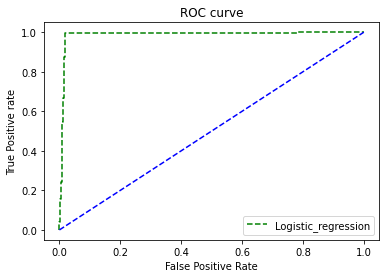

In [16]:
plt.plot(fpr, tpr, linestyle='--',color='green', label='Logistic_regression')
plt.plot([0,1],[0,1], linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [17]:
accuracy = []
for thres in thresholds:
    y_pred = np.where(y_train_pred_proba[:,1]>thres,1,0)
    accuracy.append(accuracy_score(y_train, y_pred, normalize=True))
    
accuracy

[0.5025,
 0.5025,
 0.52,
 0.52125,
 0.57875,
 0.58,
 0.61875,
 0.62,
 0.70625,
 0.7075,
 0.7675,
 0.76875,
 0.8275,
 0.82875,
 0.92875,
 0.93,
 0.98125,
 0.9825,
 0.98625,
 0.65125,
 0.65,
 0.6075,
 0.60625,
 0.49875]

In [18]:
roc_threshold = pd.DataFrame({'threshold':thresholds,'accuracy':accuracy})
roc_threshold.sort_values('accuracy',ascending=False,inplace= True)
roc_threshold

,threshold,accuracy
18,7.448837e-01,0.98625
17,8.720641e-01,0.98250
16,8.743765e-01,0.98125
15,9.126714e-01,0.93000
14,9.126911e-01,0.92875
13,9.472624e-01,0.82875
12,9.472955e-01,0.82750
11,9.595623e-01,0.76875
10,9.600352e-01,0.76750
9,9.682025e-01,0.70750


In [19]:
# chooseing threshold value 
y_test_pred_proba = model.predict_proba(X_test)

y_pred = np.where(y_test_pred_proba[:,1]>roc_threshold.iloc[0,0],1,0)


In [20]:
prediction = pd.DataFrame({"Actual":y_test,"Predicted":y_pred},columns = ['Actual','Predicted'])
prediction

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
195,1,1
196,0,0
197,1,1
198,0,0


In [21]:
print(f'Confusion Matrix : \n {pd.DataFrame(confusion_matrix(y_test,y_pred))}')

Confusion Matrix : 
     0    1
0  96    3
1   1  100


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        99
           1       0.97      0.99      0.98       101

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



# multi-class classification

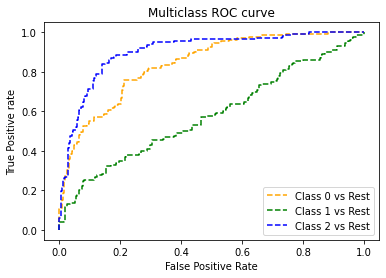

In [23]:
from sklearn.multiclass import OneVsRestClassifier

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('Multiclass ROC',dpi=300);    
